In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: Hypotheses

Null hypothesis (or $H_0$): The woman is unable to discriminate between the teas. That is, her guesses are no better than random chance. 

Alternate hypothesis (or $H_a$): The woman is able to successfully discriminate between the teas. 

Step 2: Test statistic

There are many correct answers. In this example, I will consider $X$, the number of times she correctly chose a cup with tea poured first. 

Step 3: $p$-value

The distribution of $X$ under $H_0$ can be found by analyzing the nature of the experiment. Recall that under $H_0$, the lady is unable to discriminate between the teas, so essentially, she is selecting at random. The lady is tasked to identify the nature of all 8 cups. This is equivalent to selecting the 4 with tea poured first. This is a hypergeometric problem. There are 8 cups ($M=8$). Of those, 4 had tea poured first ($n=4$). She is selecting 4 cups ($N=4$). So, under $H_0$, $X\sim \textsf{Hypergeom}(8,4,4)$. 

The $p$-value is found by calculating the probability of getting our result ($X=3$) or more extreme given $H_0$ is true. So, we are finding the probability that $X$ is 3 or higher. 

In [8]:
M,n,N=8,4,4
stats.hypergeom.pmf([3,4],M,n,N).sum()

0.24285714285714263

Step 4: Conclude

With such a large $p$-value, we would fail to reject. There is not enough evidence to say she can discriminate between teas. 

Note that in this example, we did not have to conduct simulation. We could have; since under $H_0$, $X$ has the hypergeomtric distribution, we could have used the `.rvs` method to simulate from this distribution. The results would have been roughly equivalent: 

In [14]:
np.mean(stats.hypergeom.rvs(M,n,N,size=10000)>=3)

0.2439

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [4]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: Hypotheses

$H_0$: The mean sepal widths of versicolor and virginica species are equal ($\mu_1=\mu_2$).

$H_1$: The mean sepal width of virginica is larger than that of versicolor ($\mu_2 > \mu_1$). 

Step 2: Test statistic

Difference in sample means ($\bar{X}_2 - \bar{X}_1$). 

Step 3: $p$-value

Those of you that have had statistics before might be tempted to go straight to a 2-sample $t$-test. In this case, under $H_0$, the difference in sample means has a bell-shaped distribution approximated by the $t$ distribution. We will use simulation instead. 

Under $H_0$, the mean sepal widths are the same between the two species, so we can assume that all individual sepal widths come from the same population and were assigned to species at random. Thus, we can shuffle all the sepal widths and determine an empirical distribution.

In [36]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

In [5]:
num_obs=iris_sub.num_rows
ts=[]
for _ in np.arange(10000): 
    iris_sample=iris_sub.with_column("sampled",iris_sub.sample(num_obs,with_replacement=False).column(1))
    ts=np.append(ts,np.diff(iris_sample.group(0,np.mean).column(2))[0])


NameError: name 'iris_sub' is not defined

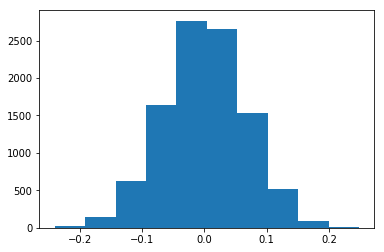

In [52]:
plt.hist(ts)
plt.show()

In [56]:
np.mean(ts>=obs)

0.0008

Step 4: Conclude

With such a low $p$-value, I would reject $H_0$ and conclude that the virginica species does in fact have a larger mean sepal width than that of versicolor. 